Student Performance Indicator

Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparat

2. Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
# Shape of the dataset

df.shape

(1000, 8)

2.2 Dataset information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

Checking the datatypes

In [7]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

Cheking for missing values

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no null values in our dataset

Check duplicate values

In [9]:
df.duplicated().sum()

# There are no duplicated values

0

Statistical Summary

In [10]:
df.describe()
# for numerical data

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* math_score max is 100 and min is 0, mean of the score is 66
* reading score mean is 70 and max is 100, min is 0
* writing score mean is 69

Statistical summary- Categorical data

In [11]:
df.describe(include = 'O')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


* There are 2 unique genders
* race_ethnicity - is 5 and most frequently repeating is group C
* parental education - many of them dont knpw the college names
* Lunch has 2 unique categories inw hich standard is most reeating


In [12]:
df.skew()

C:\Users\Alka Chauhan R\AppData\Local\Temp\ipykernel_21200\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


math_score      -0.278935
reading_score   -0.259105
writing_score   -0.289444
dtype: float64

Creating new columns total score and average score

In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Seperating into numerical and categorica columns

In [14]:
df_cat = df.select_dtypes(include = 'O')
df_num = df.select_dtypes(exclude = 'O')

In [15]:
df_cat.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


### Visualization

Univariate analysis

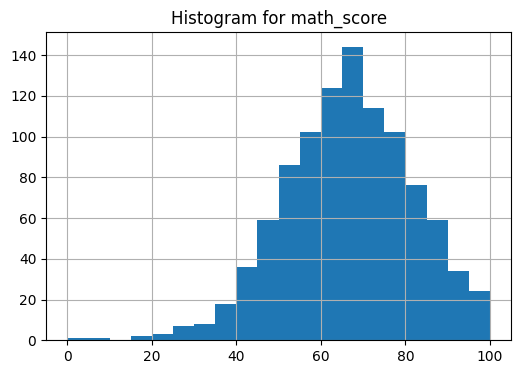

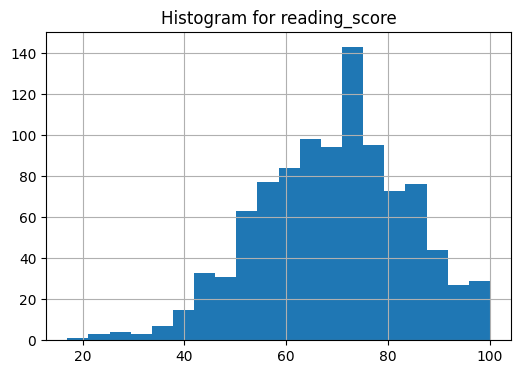

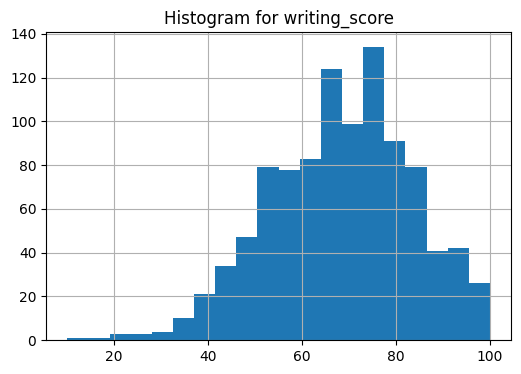

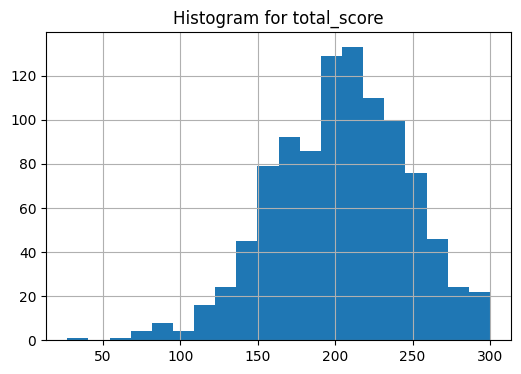

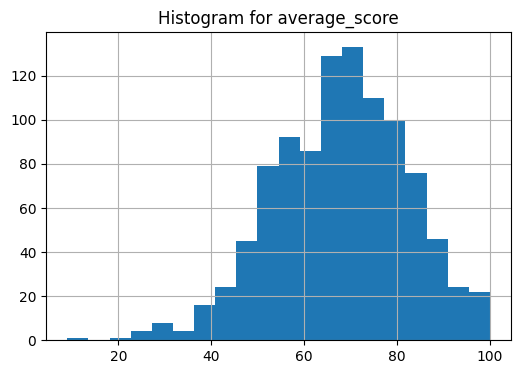

In [16]:
for column in df_num.columns:
    plt.figure(figsize=(6, 4))  
    df_num[column].hist(bins=20)
    plt.title(f'Histogram for {column}')
    plt.show()
    

Insights
* Most of the numerical variables are left skewed
* mean of all the columns are near by

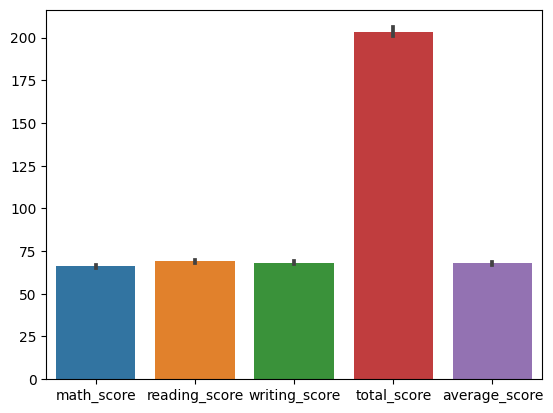

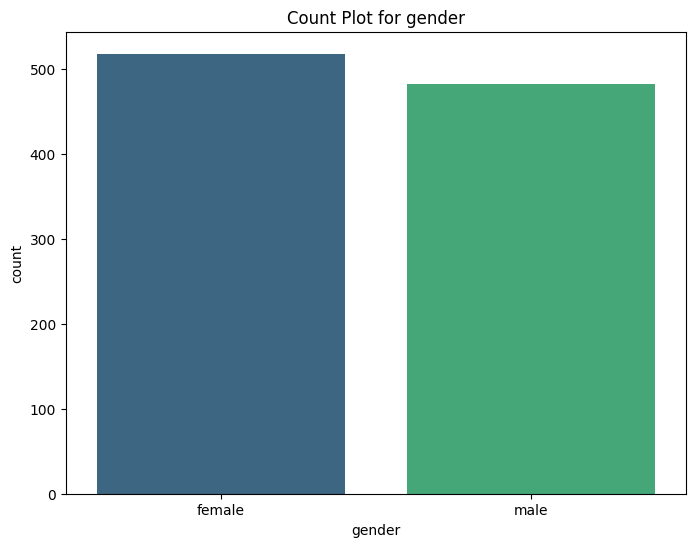

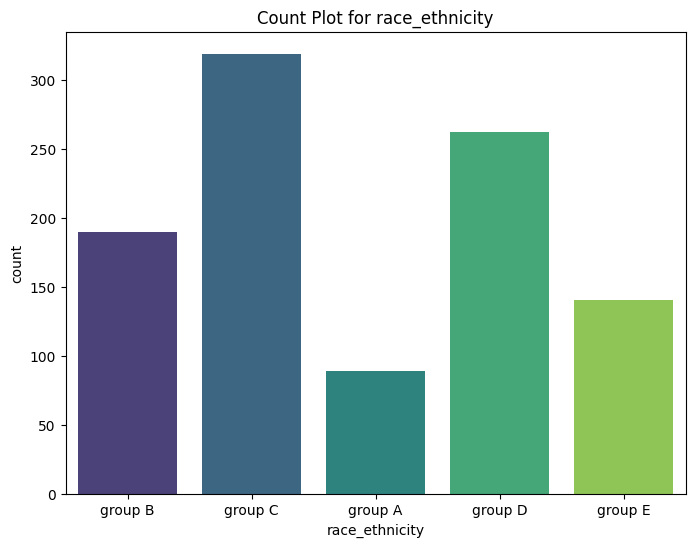

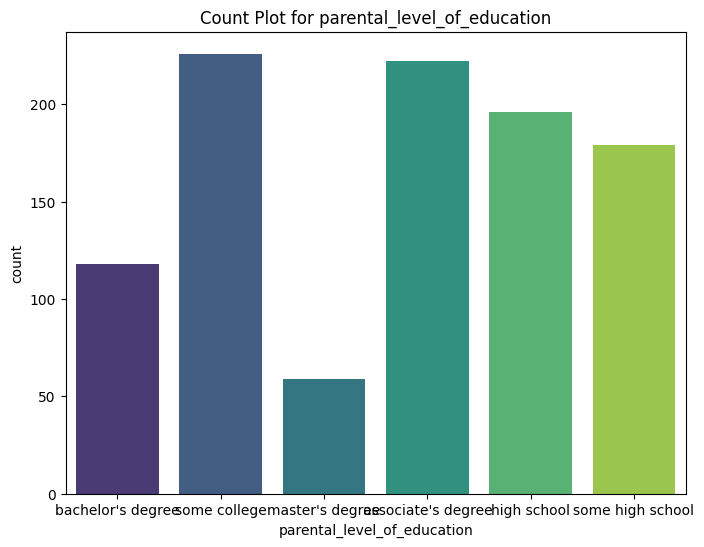

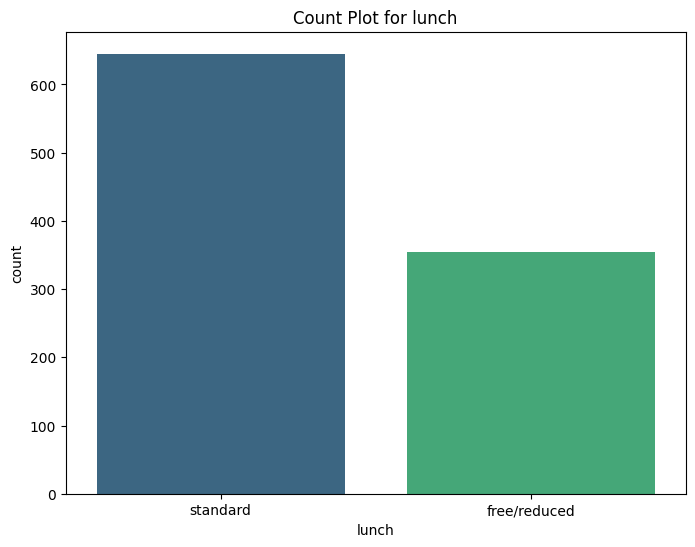

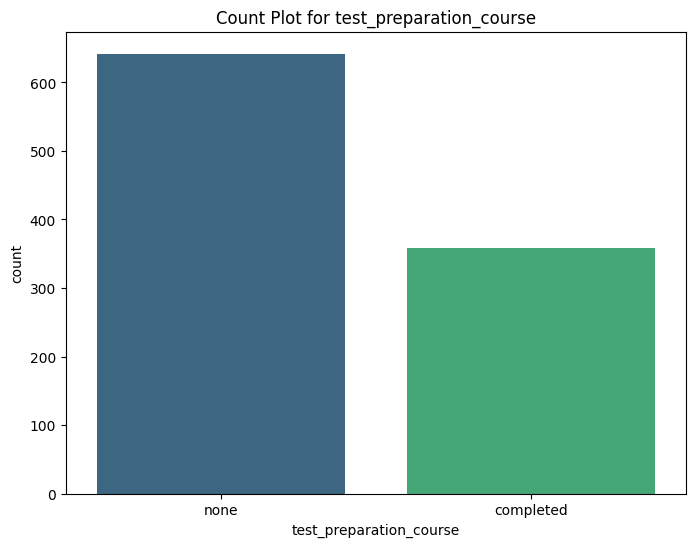

In [17]:
sns.barplot(data = df, )
for column in df_cat:
    plt.figure(figsize=(8, 6))  # Adjust figsize as needed
    sns.countplot(x=column, data=df_cat, palette='viridis')
    plt.title(f'Count Plot for {column}')
    plt.show()

Bi-Variate Analysis

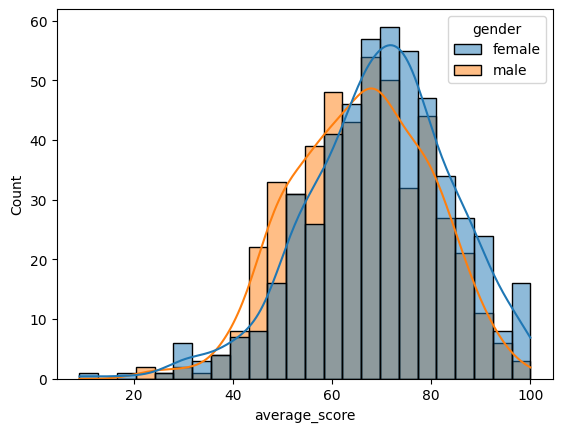

In [18]:
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()


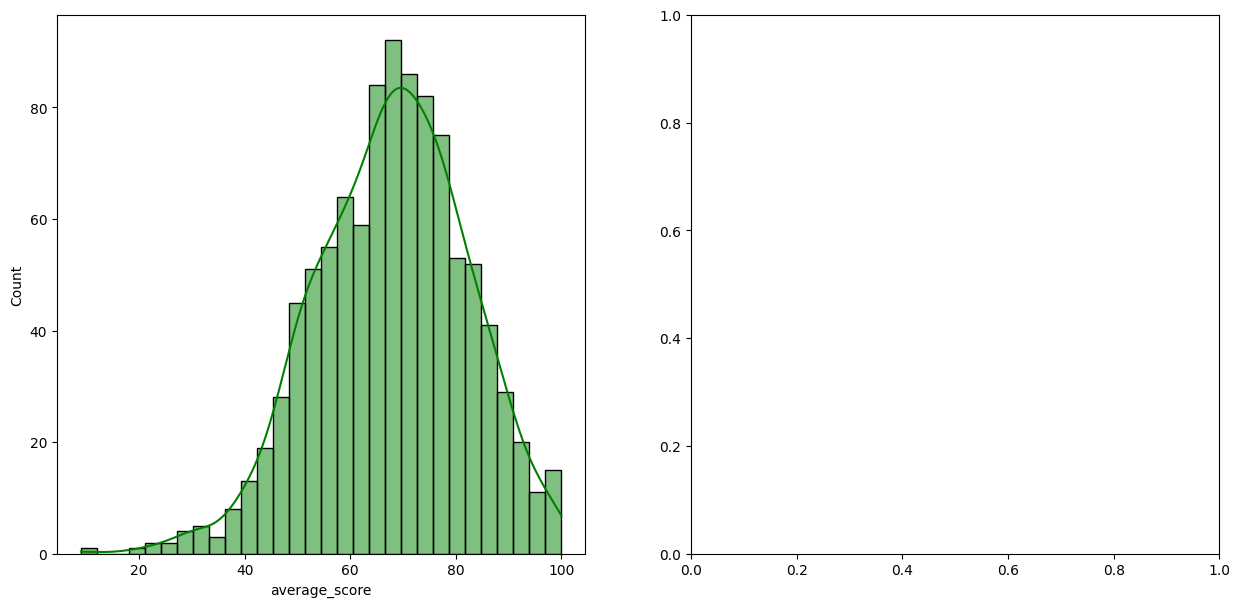

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)

plt.show()

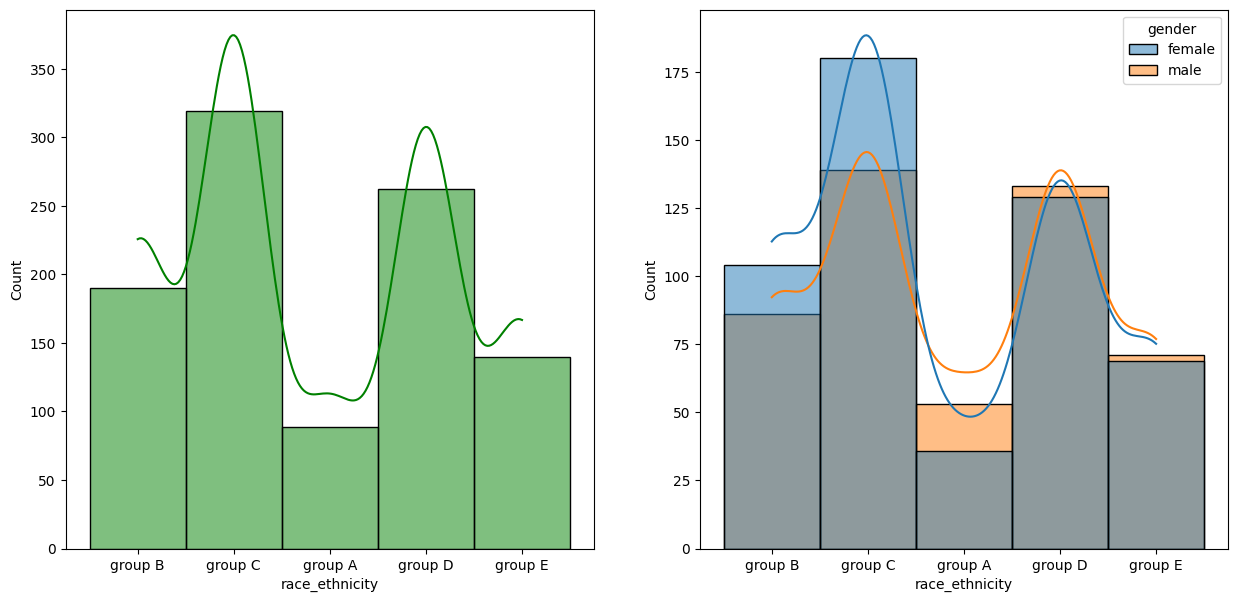

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='race_ethnicity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='race_ethnicity',kde=True,hue='gender')
plt.show()